# DSS demonstration
Access to notebook: https://github.com/H2020-IPM-openalea/DSS/blob/refactor/example/DSS_demonstration.ipynb

In [1]:
import pandas
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.max_row', 10)
import numpy as np
from weatherdata.ipm import WeatherDataHub
from openalea.dss import Hub
from docstring_parser import parse
import sys

# Acces to IPM DSS from OpenAlea python

## 1. Access to dss catalog 

In [94]:
h = Hub()
h.display()

from docstring_parser import parse
import openalea.dss

openalea.dss.__loader__
    
docstring=parse(h.display.__doc__)  
docstring.params[0].arg_name

'view'

## 2. Select dss, meta-informations 

### 2.1 select dss and model

In [3]:
psitemp=h.get(dss="no.nibio.vips", model="PSILARTEMP")

### 2.2 display meta-information of dss model

In [4]:
psitemp.informations("dataframe")

,name,id,description,type_of_decision,pests,crops,weather input,field_observation input,output,output_description
0,Carrot rust fly temperature model,PSILARTEMP,"The warning system model «Carrot rust fly temperature» is based on a Finnish temperature-based model (Markkula et al, 1998; Tiilikkala & Ojanen, 1999; Markkula et al, 2000). The model determines the start of the flight period for the 1st and 2nd generation of carrot rust fly based on accumuleted degree-days (day-degrees) over a base temperature of 5,0 °C. VIPS uses the model for the 1st generation only. \nStandard air temperature (temperature measured 2 m above ground) is used in the model. Degree-days are defined for this model as the sum of the difference between a base temperature of 5,0 °C and the mean temperature for all days with a temperature >5,0 °C, in other words (daily mean temperature – 5,0 °C) from 1 March (beginning when the ground has thawed).\n",Short-term tactical,[PSILRO],[DAUCS],1002,None,"TMDD5C, THRESHOLD_1, THRESHOLD_2, THRESHOLD_3","Accumulated day degrees, Threshold for start of flight period, Threshold for peak flight period, Threshold for end of 1st generation flight period"


### 2.3 import IPM weatherdata or local OpenAlea ressouce from local IPM catalog

In [5]:
ws=WeatherDataHub()
slu=ws.get_ressource(name="SLU Lantmet service")

weather=slu.data(parameters=[1002],latitude=[67.28],longitude=[14.37],
                 timeStart='2021-06-01',timeEnd="2021-08-20",timeZone="Europe/Paris",
                 display="json")

In [6]:
#weather

### 2.4 Run model and vizualise

* run model

In [7]:
ds=psitemp.run(weatherdata=weather)
ds

<xarray.Dataset>
Dimensions:      (time: 81)
Coordinates:
  * time         (time) datetime64[ns] 2021-05-31 2021-06-01 ... 2021-08-19
Data variables:
    TMDD5C       (time) float64 1.2 7.48 16.93 26.42 ... 509.0 515.4 519.8 524.8
    THRESHOLD_1  (time) float64 260.0 260.0 260.0 260.0 ... 260.0 260.0 260.0
    THRESHOLD_2  (time) float64 360.0 360.0 360.0 360.0 ... 360.0 360.0 360.0
    THRESHOLD_3  (time) float64 560.0 560.0 560.0 560.0 ... 560.0 560.0 560.0
Attributes:
    name:             Carrot rust fly temperature model
    id:               PSILARTEMP
    version:          1.0
    authors:          {'name': 'Berit Nordskog', 'email': 'berit.nordskog@nib...
    description:      The warning system model «Carrot rust fly temperature» ...
    description_url:  https://www.vips-landbruk.no/forecasts/models/PSILARTEMP/

* plot output

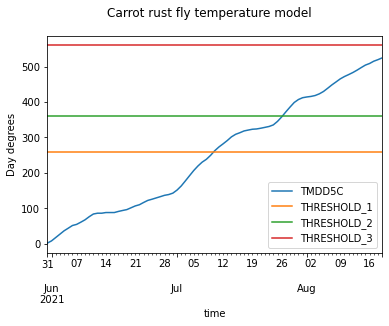

In [8]:
psitemp.plot(ds)

## Example with field observation 

In [9]:
psiobs=h.get(dss="no.nibio.vips", model="PSILAROBSE")


* import fieldObservation 

In [10]:
fieldobs=psiobs.df_reader_fieldObservation(path='C:/Users/mlabadie/Documents/GitHub/dss/example/psilarobs.csv',
                                           longitude=11.025635, 
                                           latitude=59.715791, 
                                           timeZone="Europe/Paris",
                                           sep=";", dayfirst=True,
                                           pestEPPOCode="SEPTAP",
                                           cropEPPOCode="APUGD", 
                                           convert_name=None)
fieldobs

,trapCountCropEdge,trapCountCropInside
2020-06-01 00:00:00+02:00,NaN,NaN
2020-06-02 00:00:00+02:00,NaN,NaN
2020-06-03 00:00:00+02:00,NaN,NaN
2020-06-04 00:00:00+02:00,NaN,NaN
2020-06-05 00:00:00+02:00,NaN,NaN
...,...,...
2020-06-09 00:00:00+02:00,NaN,NaN
2020-06-10 00:00:00+02:00,NaN,NaN
2020-06-11 00:00:00+02:00,NaN,NaN
2020-06-12 00:00:00+02:00,22.0,2.0


In [11]:
ds=psiobs.run(fieldObservation=fieldobs,view="Json")
ds

{'timeStart': '2020-05-31T00:00:00Z',
 'timeEnd': '2020-06-12T00:00:00Z',
 'interval': 86400,
 'resultParameters': ['TRAP_COUNT_CROP_EDGE',
  'TRAP_COUNT_THRESHOLD',
  'TRAP_COUNT_CROP_INSIDE'],
 'locationResult': [{'longitude': None,
   'latitude': None,
   'altitude': None,
   'data': [[None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [None, 1.0, None],
    [22.0, 1.0, 2.0],
    [None, 1.0, None]],
   'warningStatus': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4],
   'length': 13,
   'width': 3}]}

In [12]:
psiobs.plot(ds)

AttributeError: 'dict' object has no attribute 'fillna'